In [7]:
# Import other QSP Notebook functionality
from abm import *

# Also import other packages
# Numpy
import numpy as np
# Pandas
import pandas as pd
# Plotnine (ggplot for Python)
from plotnine import *
from matplotlib import colors
#import utilities as ut


%load_ext autoreload
%autoreload 2

from utilities import post_simulation as ut

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Objectives for this Notebook
- Run basic reaction model using python simulation framework
- plot dose response for two different binding strengths and burdens
- Apply dose achieving utility function to calculate dose at which each above condition reaches a set of thresholds

In [8]:
Tsim = pd.read_csv("./tables/sim_table_psf.csv")

display(Tsim)

,dose_mpk,binding_strength,burden
0,0.00001,strong,low
1,0.00001,strong,high
2,0.00001,weak,low
3,0.00001,weak,high
4,0.00002,strong,low
...,...,...,...
71,5.00000,weak,high
72,10.00000,strong,low
73,10.00000,strong,high
74,10.00000,weak,low


In [9]:
Tpar = pd.read_csv("./tables/par_table_psf.csv")
display(Tpar)

,binding_strength,burden,parameter,value,unit
0,*,*,volume_central,5.000000e+00,L
1,*,low,R1_per_cell,1.000000e+04,1
2,*,high,R1_per_cell,1.000000e+06,1
3,*,*,cell_per_mL,1.000000e+04,(1/mL)
4,*,*,kon,1.000000e-03,(1/nM/s)
5,strong,*,kd_mab,1.000000e-01,nM
6,weak,*,kd_mab,2.000000e+00,nM
7,*,*,el_half,2.800000e+01,d
8,*,*,abs_half,2.500000e+00,d
9,*,*,R1_half,6.000000e+01,min


In [10]:
Tdos = pd.read_csv('./tables/dose_table_psf.csv')

display(Tdos)

,dose_mpk,route,amounts,amount_unit,times,time_unit
0,0.00001,IV_mpk,0.00001,(mg/kg),"[0,21]",d
1,0.00002,IV_mpk,0.00002,(mg/kg),"[0,21]",d
2,0.00005,IV_mpk,0.00005,(mg/kg),"[0,21]",d
3,0.00010,IV_mpk,0.00010,(mg/kg),"[0,21]",d
4,0.00020,IV_mpk,0.00020,(mg/kg),"[0,21]",d
5,0.00050,IV_mpk,0.00050,(mg/kg),"[0,21]",d
6,0.00100,IV_mpk,0.00100,(mg/kg),"[0,21]",d
7,0.00200,IV_mpk,0.00200,(mg/kg),"[0,21]",d
8,0.00500,IV_mpk,0.00500,(mg/kg),"[0,21]",d
9,0.01000,IV_mpk,0.01000,(mg/kg),"[0,21]",d


In [15]:
result_pandas = simulate(models='./model_files/antireceptor_model_1compartment-1.txt',
                  outputs=["cytokine_central_nM","receptor_occupancy"],
                  simulations=Tsim,
                  parameters=Tpar,
                  doses=Tdos,
                  times=linspace(0, 2, 201, 'd')).to_pandas(tall_outputs = True)

/opt/pixi/cache/envs/abm-platform-training-11393412784987863449/envs/default/lib/python3.12/site-packages/abm/_simulate.py:355: UserWarning: Parameters not present in the model will be ignored: nonexist 


Total: 0, Running: 0, Succeeded: 0, Failed: 0

In [16]:
result_pandas

,dose_mpk,binding_strength,burden,id,t,output,value,output_unit
0,0.00001,strong,low,0,0.0,cytokine_central_nM,1.000000e-16,nM
1,0.00001,strong,low,0,0.0,receptor_occupancy,0.000000e+00,1
2,0.00001,strong,low,0,864.0,cytokine_central_nM,1.143564e-16,nM
3,0.00001,strong,low,0,864.0,receptor_occupancy,7.121404e-02,1
4,0.00001,strong,low,0,1728.0,cytokine_central_nM,1.838242e-15,nM
...,...,...,...,...,...,...,...,...
30547,10.00000,weak,high,75,171072.0,receptor_occupancy,9.975374e+01,1
30548,10.00000,weak,high,75,171936.0,cytokine_central_nM,3.103695e-02,nM
30549,10.00000,weak,high,75,171936.0,receptor_occupancy,9.975368e+01,1
30550,10.00000,weak,high,75,172800.0,cytokine_central_nM,3.104037e-02,nM


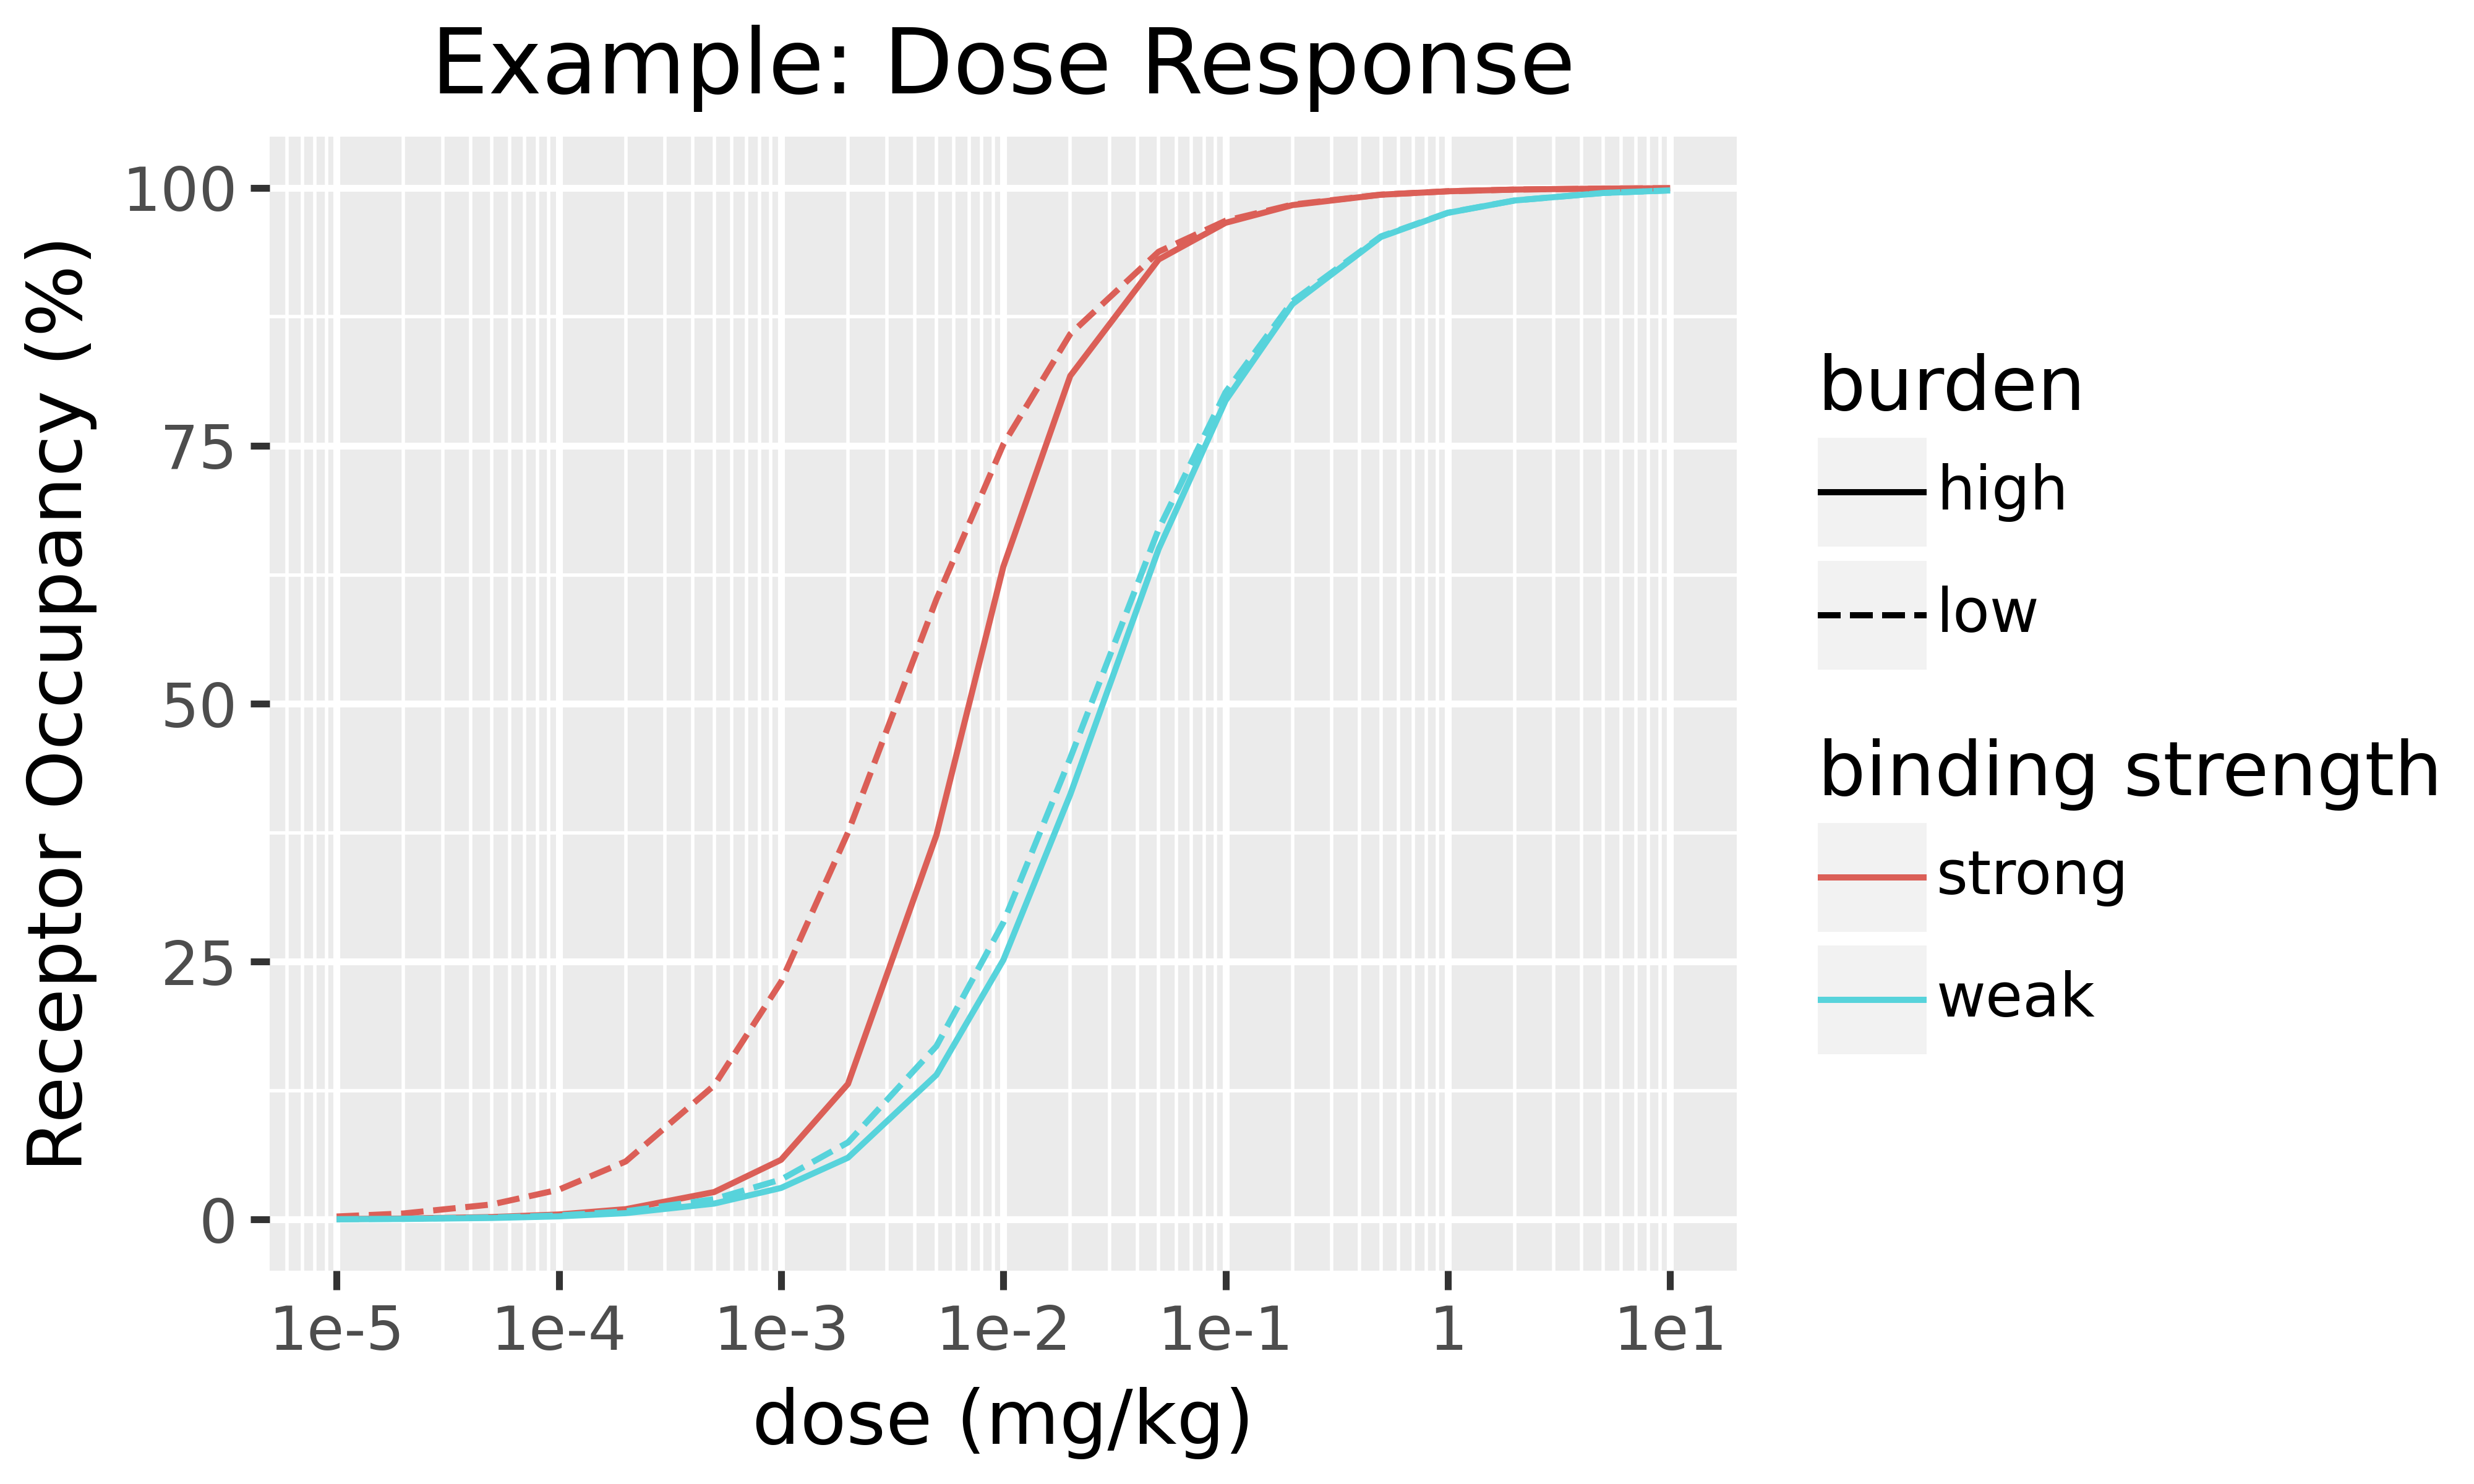

In [17]:
to_plot = ['receptor_occupancy']

T_results = result_pandas[result_pandas.t == 2.0*24*3600]

fig = (ggplot()
 + geom_line(data = T_results[T_results.output.isin(to_plot)],
             mapping = aes(x='dose_mpk',y = 'value',linetype = 'factor(burden)',
                           color = 'factor(binding_strength)'))
 + theme(figure_size = (5,3),dpi = 400)
 + scale_x_log10(breaks = 10.0**np.arange(-5,2))
 + ggtitle('Example: Dose Response')
 + labs(x= 'dose (mg/kg)', y = 'Receptor Occupancy (%)', color = 'binding strength',linetype = 'burden')
)

display(fig)

In [18]:
#Function is defined to create a list of all combinations of two different condition options.

#For example we will use this function to create a list of all possible combinations of binding
#strength and burden. This allows you to automate the process without having to manually type out
#all options
def merge(list1, list2):
    list1_tile = list(np.tile(list1,len(list2)))
    list2_tile = list(np.repeat(list2,len(list1)))
    merged_list = [[list1_tile[i], list2_tile[i]] for i in range(0, len(list1_tile))]
    return merged_list

In [19]:
burdens = list(np.unique(result_pandas.burden))
strengths = list(np.unique(result_pandas.binding_strength))

conditions = merge(burdens,strengths)

In [20]:
print(conditions)

[['high', 'strong'], ['low', 'strong'], ['high', 'weak'], ['low', 'weak']]


In [21]:
# name and define specific metrics to calculate.
#In this example we draw thresholds at 20%, 50%, and 90% RO.
#The metric dict should be in the form {metric_name: [output_name,target_output_threshold]} 
metrics = {
    'RO50':['receptor_occupancy',50],
    'RO20':['receptor_occupancy',20],
    'RO90':['receptor_occupancy',90]
}

Dose_table = []

#The dose achieving utility can only run one metric and one condition at a time. Create a loop to
#run through all combinations of metrics and conditions. Output the results into a table for
#readability
for metric in metrics:
    for cond in conditions:
        temp = T_results.query("binding_strength == '{1}' & burden == '{0}'".format(cond[0], cond[1]))
        # function dose_achieving returns the dose achieiving some metric e.g. RO90
        dose_val = ut.dose_achieving(temp, *metrics[metric])
        dose_val = [np.around(x,4) for x in dose_val]
        Dose_table.append([cond[0],cond[1],int(metric[-2:]),dose_val[0]])
        
Threshold_table = pd.DataFrame(Dose_table,columns = ['burden','binding_strength', 'RO','dose_projection_mpk'])

In [22]:
Threshold_table

,burden,binding_strength,RO,dose_projection_mpk
0,high,strong,50,0.0074
1,low,strong,50,0.0037
2,high,weak,50,0.0311
3,low,weak,50,0.0271
4,high,strong,20,0.0029
5,low,strong,20,0.0008
6,high,weak,20,0.0077
7,low,weak,20,0.0063
8,high,strong,90,0.0419
9,low,strong,90,0.0357


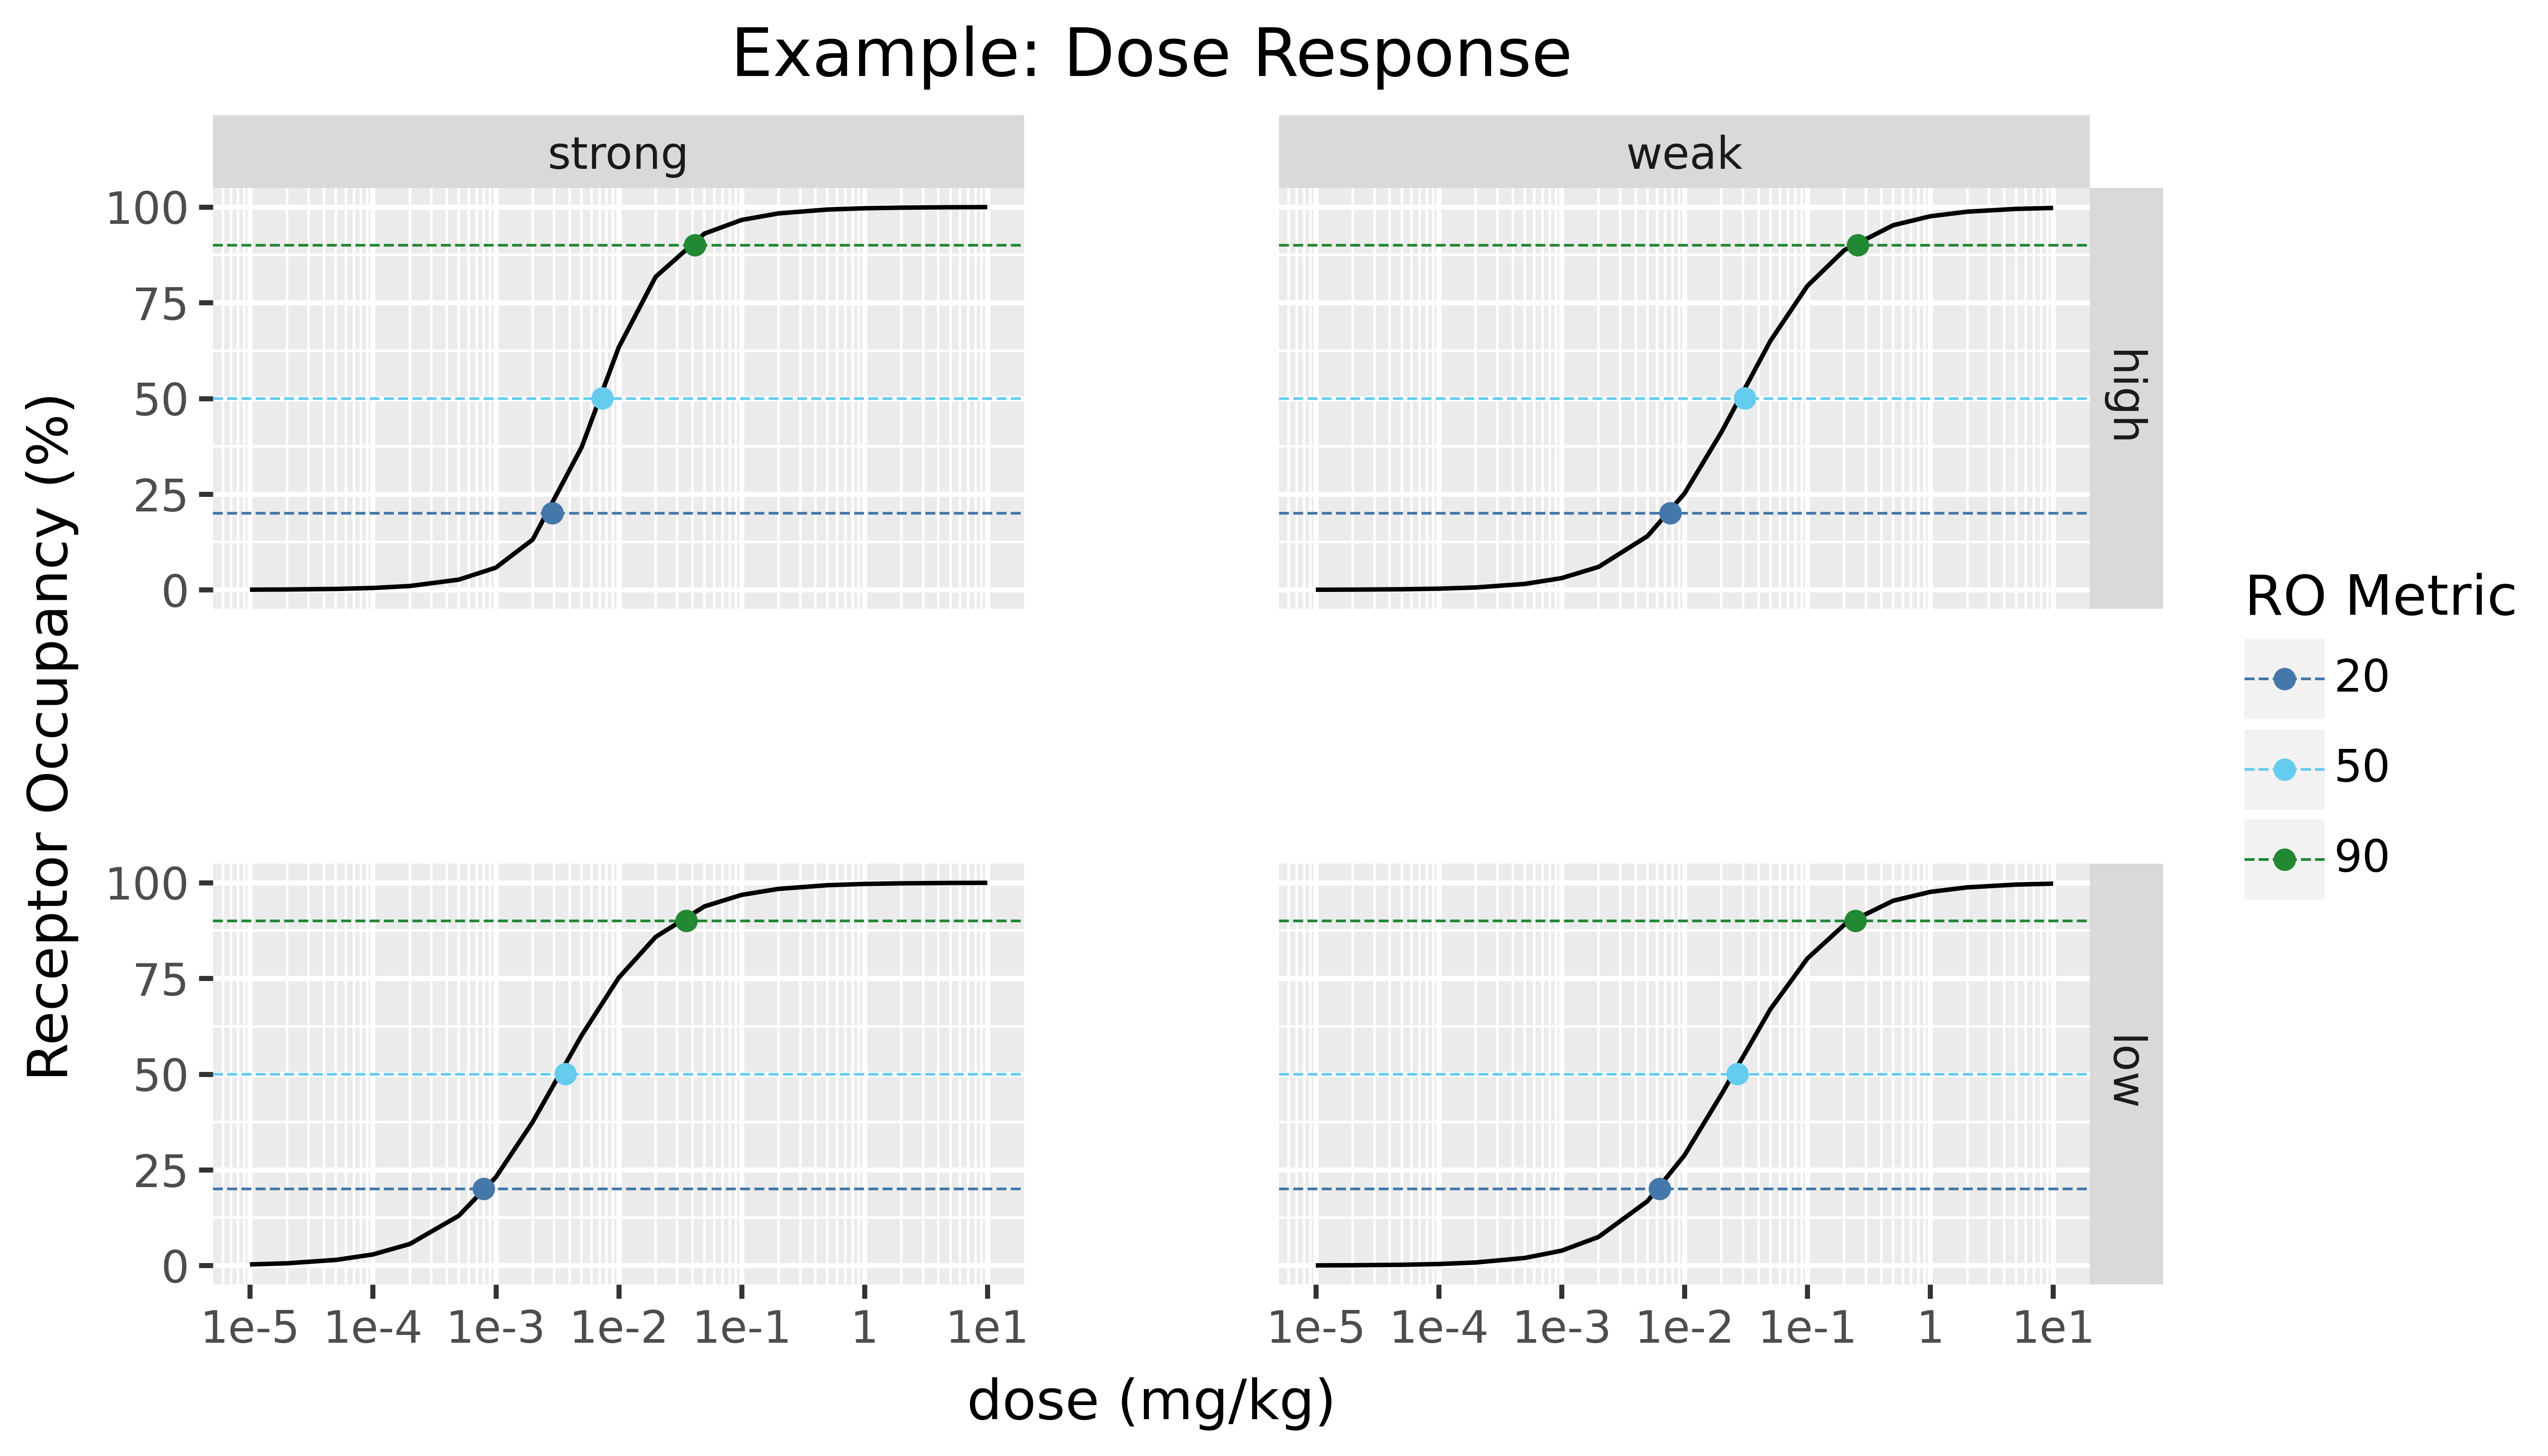

In [23]:
#Plot dose response of RO with each dose achieving value marked on the plot
#Note that the quality of the estimate depends on the mesh of the original dose sweep as the 
#function *linearly* interpolates between recorded values
to_plot = ['receptor_occupancy']

T_results = result_pandas[result_pandas.t == 2.0*24*3600]

fig = (ggplot()
 + geom_line(data = T_results[T_results.output.isin(to_plot)],
             mapping = aes(x='dose_mpk',y = 'value'))
 + geom_hline(data = Threshold_table, mapping = aes(yintercept = 'RO', color = 'factor(RO)'), linetype = 'dashed', size = 0.3)
 + geom_point(data = Threshold_table,mapping = aes(x = 'dose_projection_mpk',y = 'RO', color = 'factor(RO)'))
 + theme(figure_size = (7,4),dpi = 400,panel_spacing=0.1)
 + facet_grid('burden~binding_strength')
 + scale_x_log10(breaks = 10.0**np.arange(-5,2))
 + ggtitle('Example: Dose Response')
 + scale_color_manual(values = ut.color_scheme())
 + labs(x= 'dose (mg/kg)', y = 'Receptor Occupancy (%)',color = 'RO Metric')
)

display(fig)